In [1]:
import numpy as np
from math import erf
import plotly.express as px
import pandas as pd
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [2]:
# constants 
e = 1.6*(10**(-7))
Il = 10**(-27)
h = 6.6*(10**(-46))
epsilon = 8.8*(10**(36))
miue = 0.02*(10**(24))
alpha = 600000
niuopt = 375
taul = 100*(10**(-3))
tauc = 1
taur = 100
eta = 900
l = 10*(10**(-6))
w = 10*(10**(-6))
T = 0.8*(10**(-6))
Vbias = 30*(10**(-36))
Za = 65*(10**(-36))
n0=1e18
V0 = 10**(-36)

In [3]:
def C(t):
  C = taur/Za*(1+e*miue*Za*w*n(t))
  return C 

def Beta(t):
  B = e*miue*taur*n(t)/eta*epsilon 
  return B

In [4]:
def n(t):
  n_value = Il*0.682*0.1353
  n_value = n_value* ( ((np.sqrt(2*np.pi)*alpha)/(4*h*niuopt))*taul )
  n_value = n_value* ( np.exp(-(taul**2)/(8*(tauc**2)) - t/tauc ) )

  # erf_values = []
  # for t in t:
  erf_temp = erf((np.sqrt(2)*t/taul) - (np.sqrt(2)*taul/(4*tauc)))
  #  erf_values.append(erf_temp)

  n_value = n_value* ( np.array(erf_temp) + 1 )

  return n_value

In [5]:
t = np.linspace(-1, 6, 250)        #* (10**(-12)) seconds
data = pd.DataFrame()
n_values = []
c_values = []
for time in t:
  n_temp = n(time)
  n_values.append(n_temp)
  c_values.append(C(time))
data['time'] = t
data['n'] =n_values # n(t)/n0
data['C'] = c_values
data

,time,n,C
0,-1.000000,0.000000e+00,1.538462e+36
1,-0.971888,0.000000e+00,1.538462e+36
2,-0.943775,0.000000e+00,1.538462e+36
3,-0.915663,0.000000e+00,1.538462e+36
4,-0.887550,0.000000e+00,1.538462e+36
...,...,...,...
245,5.887550,7.766847e+16,1.538462e+36
246,5.915663,7.551542e+16,1.538462e+36
247,5.943775,7.342206e+16,1.538462e+36
248,5.971888,7.138673e+16,1.538462e+36


In [ ]:
fig = px.line(data, x="time", y="n")
fig.show()

In [ ]:
fig = px.line(data, x="time", y="C")
fig.show()

In [ ]:
# dndt = derivative(n, t, 1e-6)
# data["dndt"] = dndt

# fig = px.line(data, x="time", y="dndt")
# fig.show()

In [ ]:
# def N(t):
#   n_value = Il*0.682*0.1353
#   n_value = n_value* ( ((np.sqrt(2*np.pi)*alpha)/(4*h*niuopt))*taul )
#   n_value = n_value* ( np.exp(-(taul**2)/(8*(tauc**2)) - t/tauc ) )

#   erf_values = []
#   for t in t:
#     erf_temp = erf((np.sqrt(2)*t/taul) - (np.sqrt(2)*taul/(4*tauc)))
#     erf_values.append(erf_temp)

#   n_value = n_value* ( np.array(erf_values) + 1 )

#   return n_value

In [6]:
t = np.linspace(-0.5, 6, 1000)       # (10**(-12)) seconds
data = pd.DataFrame()
data['time'] = t
# data['N'] = N(t)
# data['C'] = C(t)
data

,time
0,-0.500000
1,-0.493493
2,-0.486987
3,-0.480480
4,-0.473974
...,...
995,5.973974
996,5.980480
997,5.986987
998,5.993493


In [7]:
# fig = px.line(data, x="time", y="N")
# fig.show()

In [8]:
# fig = px.line(data, x="time", y="C")
# fig.show()

#  References:
https://www.w3schools.com/python/ref_math_erf.asp#:~:text=erf()%20method%20returns%20the,between%20%2D%201%20to%20%2B%201.

In [9]:
# t = np.linspace(-1,7, 1000)    #* (10**(-12)) seconds
# data = pd.DataFrame()
# data['time'] = t
# data['n'] = n(t)/n0
# data['C'] = C(t)
# data

In [10]:
# def Vc(t): 
#   value = (( 0.1353*0.682*e*(l*w*T)*alpha) * (Il) * np.exp( -2*(t**2) /(taul**2)))/(h*niuopt)
#   value = value - Vbias/Za
#   value = value - e*(l*w*T)*n(t)/tauc
#   value = np.divide(value, ( -1/Za - (e*miue*n(t)*taur/(Za*epsilon*eta)) - ( 0.1353*0.682*w*e*miue*(1-np.exp(-alpha*T))*n(t))/l*alpha ) )
#   return value

# data["Vc"] = Vc(t)/V0

# fig = px.line(data, x="time", y="Vc")
# fig.show()

In [11]:
# def Vrad(t): 
#   value = Vc(t)*n(t)*Za*e*miue*w
#   return value

# data["Vrad"] = Vrad(t)/V0

# fig = px.line(data, x="time", y="Vrad")
# fig.show()

In [12]:
# def Wc(t): 
#   value = Vbias/Za
#   value = np.divide(value, ( (w*e*miue*n(t)) + 1/Za + (e*miue*n(t)*taur/(Za*epsilon*eta)) + ( 0.1353*0.682*w*e*miue*(1-np.exp(-alpha*T))*n(t))/l*alpha ) )
#   return value

# data["Wc"] = Wc(t)/V0

# fig = px.line(data, x="time", y="Wc")
# fig.show()

In [13]:
# def Wrad(t): 
#   value = Wc(t)*n(t)*Za*e*miue*w
#   return value

# data["Wrad"] = Wrad(t)/V0

# fig = px.line(data, x="time", y="Wrad")
# fig.show()

In [ ]:
# def J(t): 
#   value = Vc(t)*n(t)*e*miue/l
#   return value

# data["J"] = J(t)

# fig = px.line(data, x="time", y="J")
# fig.show()

In [ ]:
# # constants 
# e = 1.6*(10**(-19))
# Il = 10**9
# h = 6.6*(10**(-34))
# epsilon = 8.8*(10**(-12))
# miue = 0.02
# alpha = 600000
# niuopt = 375e12
# taul = 100*(10**(-15))
# tauc = 1*(10**(-12))
# taur = 100*(10**(-12))
# eta = 900
# l = 10*(10**(-6))
# w = 10*(10**(-6))
# T = 0.8*(10**(-6))
# Vbias = 30
# Za = 65

In [14]:
def G(t):
  value = (w*e*miue*np.exp(-2)*0.682*(1-np.exp(-alpha*t))*n(t)/(alpha*l))
  return value

In [15]:
def dC(t):
  value = taur*e*miue*w
  value = value*( -n(t)/tauc + (0.135*0.682*alpha*Il*np.exp(-2*(t**2)/(taul**2) ))/(h*niuopt) )
  return value

***

In [16]:
Vbias, Za

(3e-35, 6.5e-35)

In [17]:
# Set up the partial differential equation problem
def dVc_by_dt(Vc, t):
    values = Vbias/(Za*C(t)) - (Vc/(Za*C(t))) - (Beta(t)*Vc/(Za*C(t))) - (G(t)*Vc/C(t)) - dC(t)*Vc/C(t)
    return values

In [57]:
# # constants 
# e = 1.6e-19
# Il = 1e9
# h = 6.6e-34
# epsilon = 8.8*(10**(-12))
# miue = 0.02
# alpha = 600000
# niuopt = 375e12
# taul = 100*(10**(-15))
# tauc = 1*(10**(-12))
# taur = 100*(10**(-12))
# eta = 900
# l = 10*(10**(-6))
# w = 10*(10**(-6))
# T = 0.8*(10**(-6))
# Vbias = 30
# Za = 65
# n0=1e18
# V0 = 10**(-36)

In [23]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [60]:
pend([1,2], 10, 1,1)

[2, -2.8414709848078967]

In [20]:
from scipy.integrate import odeint

In [24]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))

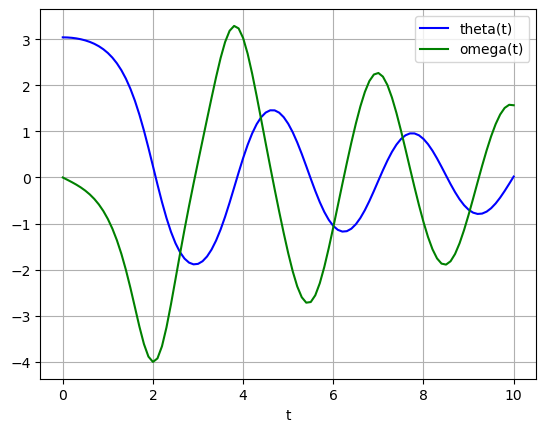

In [25]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [28]:
T = np.linspace(-0.1, 6, 1000)      # (10**(-12)) seconds

solution = odeint(dVc_by_dt, 30, T)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.1000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 = -0.9389389389389D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 = -0.1000000000000D+00   r2 = -0.1000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 = -0.8778778778779D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 = -0.1000000000000D+00   r2 = -0.1000000000000D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 = -0.8778778778779D-01


/tmp/ipykernel_23869/2046246426.py:2: RuntimeWarning: overflow encountered in exp
  value = (w*e*miue*np.exp(-2)*0.682*(1-np.exp(-alpha*t))*n(t)/(alpha*l))
/home/hari31416/anaconda3/envs/data-science/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [29]:
solution

array([[3.00000000e+001],
       [            nan],
       [            nan],
       [2.21927648e-316],
       [5.20843690e-090],
       [1.81148490e-152],
       [4.86539619e-042],
       [3.53978526e-057],
       [5.47038392e-095],
       [6.01347002e-154],
       [8.16114844e-043],
       [1.48346280e-076],
       [6.01391519e-154],
       [8.55089125e-072],
       [3.92322957e+179],
       [4.07356338e+223],
       [8.94213159e+130],
       [1.65689925e-047],
       [1.05691740e+141],
       [6.01347002e-154],
       [7.11874978e-067],
       [8.31860025e-072],
       [6.12743486e-154],
       [4.69633374e-086],
       [5.93971279e-038],
       [1.03080661e+136],
       [6.01347002e-154],
       [6.81671926e-038],
       [1.10790837e-047],
       [6.01347176e-154],
       [4.17635602e-062],
       [5.20843690e-090],
       [1.81148490e-152],
       [4.86539619e-042],
       [3.53978526e-057],
       [5.47038392e-095],
       [6.01347002e-154],
       [8.16114844e-043],
       [1.48

In [13]:
def rk4_general(F, x, x0, y0, n=100):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = F(x0+i*h, y_prev)
        k2 = F(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = F(x0+(i+0.5)*h, y_prev+h*k2*0.5)
        k4 = F(x0+(i+1)*h, y_prev+h*k3)
        y_prev = y_prev + (k1+2*k2+2*k3+k4)*h/6
    return y_prev

In [19]:
f = lambda t, Vc: dVc_by_dt(Vc, t)

def F(t, Vc):
    return dVc_by_dt(Vc, t)

In [39]:
t = np.linspace(-1, 6, 250)
Vcs = np.zeros(len(t))
Vcs0 = 1e-4
t0 = 0

for i in range(len(t)):
    Vcs[i] = rk4_general(F, t[i], t0, Vcs0)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [38]:
Vcs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

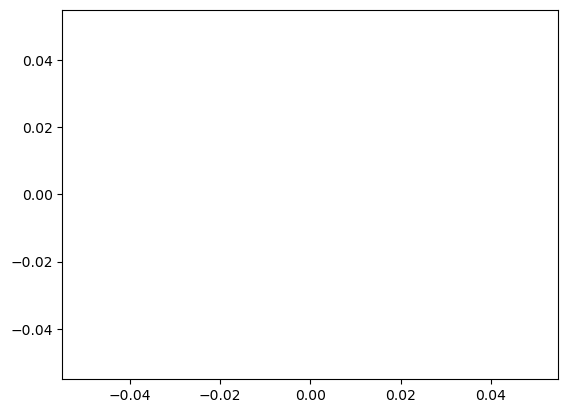

In [21]:
plt.plot(t, Vcs)

In [1]:
import numpy as np
a = 1
b = 1
n1 = 1
n2 = 1
def func_1(x):
    if abs(x)<a/2:
        return n1**2
    else:
        return n2**2
    
def func_2(x, y):
    if abs(x)<a/2 and abs(y)<b/2:
        return n1**2
    else:
        return n2**2

In [4]:
abs(1.004)

1.004